In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:

df = pd.read_csv('binance/ETHUSDT_merged.csv')

In [4]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


In [5]:
df2 = df[['open_time','close']]

In [6]:
df2.head()

,open_time,close
0,2019-09-01 00:00:00,172.45
1,2019-09-01 01:00:00,172.71
2,2019-09-01 02:00:00,172.43
3,2019-09-01 03:00:00,172.57
4,2019-09-01 04:00:00,172.46


In [7]:
df2.to_csv('ETHUSD_Hourly.csv',index=False)

In [12]:
eth_df = pd.read_csv('ETHUSD_Hourly.csv',index_col=[0],parse_dates=[0])

In [13]:
eth_df.head()

,close
open_time,
2019-09-01 00:00:00,172.45
2019-09-01 01:00:00,172.71
2019-09-01 02:00:00,172.43
2019-09-01 03:00:00,172.57
2019-09-01 04:00:00,172.46


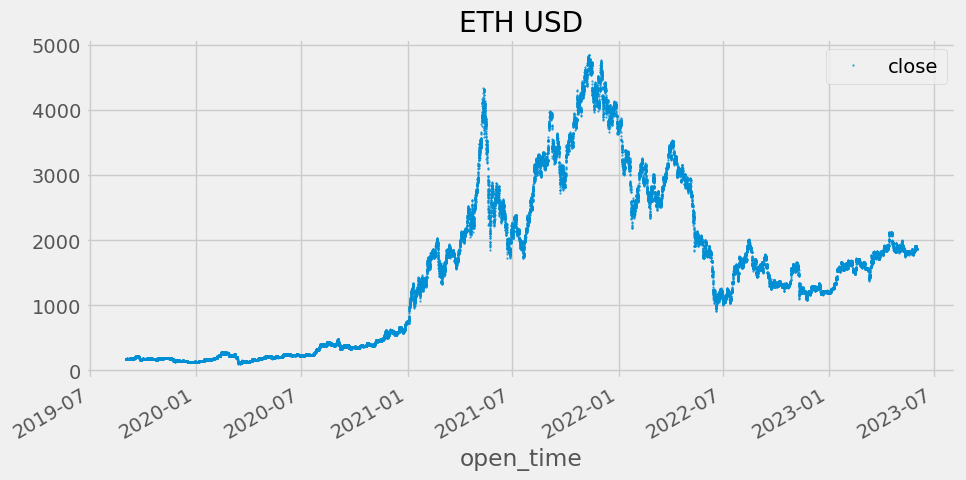

In [14]:
color_pal = sns.color_palette()
eth_df.plot(style='.',
         figsize=(10,5),
         ms =1,
         color=color_pal[0],
         title='ETH USD')
plt.show()

# Simple Prophet Model
Prophet model expects the dataset to be named a specific way. We will rename our dataframe columns before feeding it into the model.
Datetime column named: ds
target : y

In [16]:
split_date = '1-Jan-2022'
eth_usd_train = btc_df.loc[btc_df.index <= split_date].copy()
eth_usd_test = btc_df.loc[btc_df.index > split_date].copy()

In [17]:
eth_usd_train_prophet = eth_usd_train.reset_index() \
    .rename(columns={'open_time':'ds',
                     'close':'y'})

In [18]:
%%time
model = Prophet()
model.fit(eth_usd_train_prophet)

21:00:56 - cmdstanpy - INFO - Chain [1] start processing
21:01:26 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 2.07 s, sys: 264 ms, total: 2.33 s
Wall time: 33.1 s


In [19]:
eth_usd_test_prophet = eth_usd_test.reset_index().rename(columns={'open_time':'ds','close':'y'})

In [20]:
eth_usd_test_fcst = model.predict(eth_usd_test_prophet)

In [21]:
eth_usd_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01 01:00:00,3783.163691,3755.275732,4131.871765,3783.163691,3783.163691,165.537612,165.537612,165.537612,1.223585,...,-4.470240,-4.470240,-4.470240,168.784267,168.784267,168.784267,0.0,0.0,0.0,3948.701302
1,2022-01-01 02:00:00,3783.318421,3756.025268,4133.726116,3783.318421,3783.318421,164.834492,164.834492,164.834492,0.195504,...,-4.298260,-4.298260,-4.298260,168.937248,168.937248,168.937248,0.0,0.0,0.0,3948.152913
2,2022-01-01 03:00:00,3783.473151,3753.485824,4135.852546,3783.473151,3783.473151,164.367468,164.367468,164.367468,-0.614988,...,-4.108490,-4.108490,-4.108490,169.090946,169.090946,169.090946,0.0,0.0,0.0,3947.840619
3,2022-01-01 04:00:00,3783.627881,3747.494091,4146.224256,3783.627881,3783.627881,164.630397,164.630397,164.630397,-0.710322,...,-3.904624,-3.904624,-3.904624,169.245342,169.245342,169.245342,0.0,0.0,0.0,3948.258278
4,2022-01-01 05:00:00,3783.782611,3761.599792,4139.823901,3783.782611,3783.782611,165.564762,165.564762,165.564762,-0.145268,...,-3.690390,-3.690390,-3.690390,169.400420,169.400420,169.400420,0.0,0.0,0.0,3949.347373


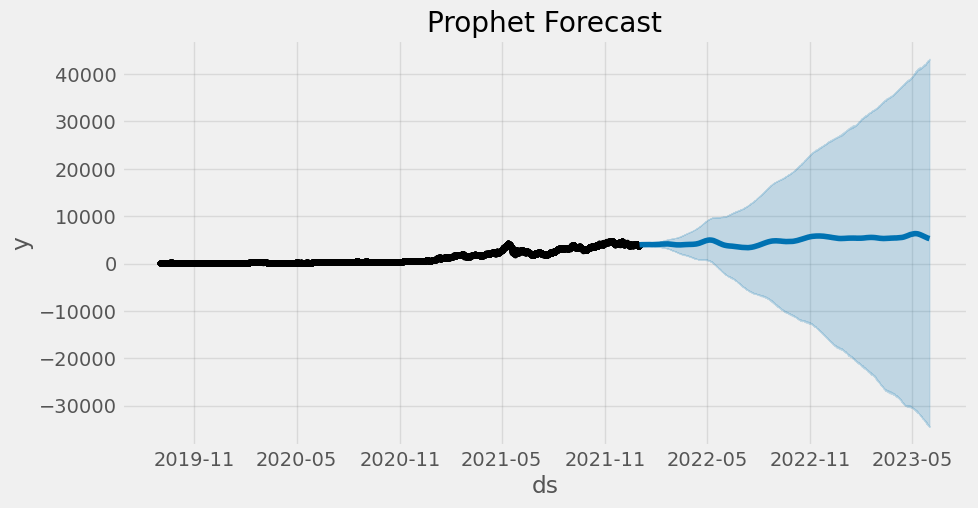

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(eth_usd_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

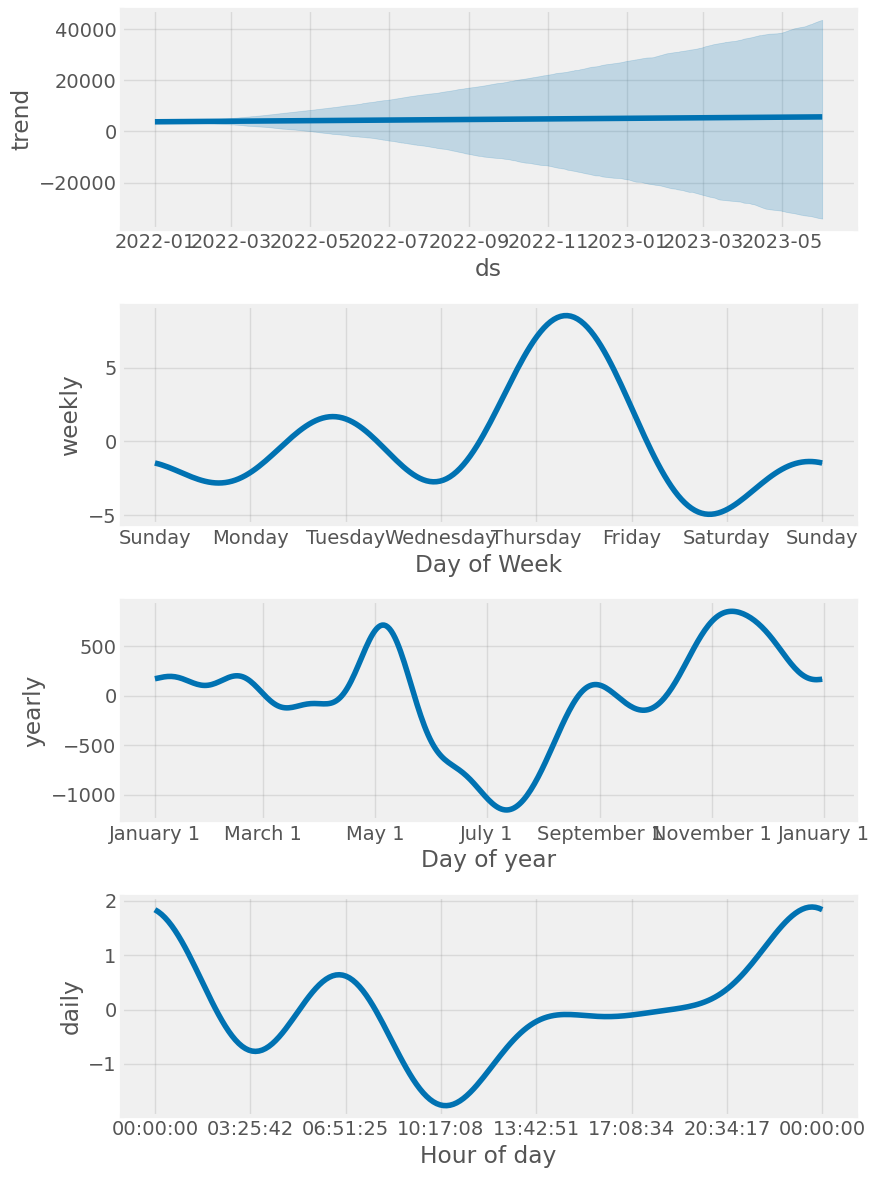

In [23]:
fig = model.plot_components(eth_usd_test_fcst)
plt.show()

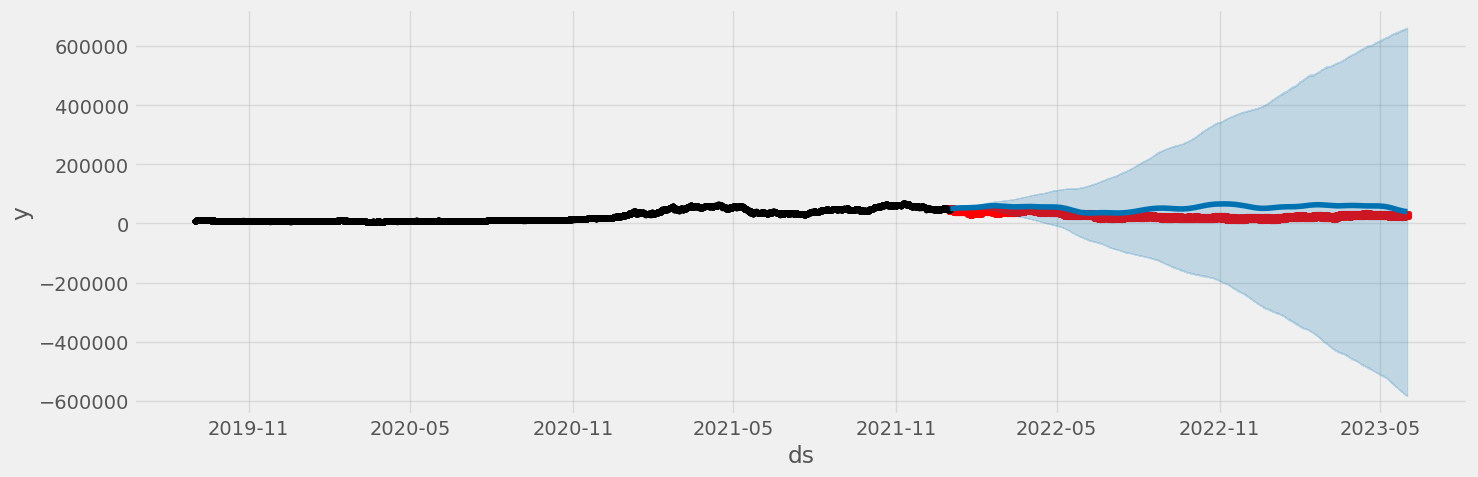

In [65]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(btc_usd_test.index, btc_usd_test['close'], color='r')
fig = model.plot(btc_usd_test_fcst, ax=ax)

# Evaluate the model with Error Metrics

In [68]:
np.sqrt(mean_squared_error(y_true=eth_usd_test['close'],
                   y_pred=btc_usd_test_fcst['yhat']))

28558.316807157342

In [69]:
mean_absolute_error(y_true=eth_usd_test['close'],
                   y_pred=btc_usd_test_fcst['yhat'])

26075.04209164346

In [70]:
mean_absolute_percentage_error(y_true=eth_usd_test['close'],
                   y_pred=btc_usd_test_fcst['yhat'])

115.26469841705267